### Importing Necessary Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns

### Dataset Loading 

In [113]:
df = pd.read_csv(r"F:\Ineuron DS\Power Bi Dashboard\Google play store\googleplaystore.csv")

In [114]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [115]:
df.shape

(10841, 13)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [117]:
df.describe(include = "all")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
# Null values 

null = df.isnull().sum().sort_values(ascending=False)[0:5]
percent = (null/len(df)).sort_values(ascending=False)

null_count = pd.DataFrame({"total_null": null, "percentage": percent})

In [119]:
null_count

,total_null,percentage
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Type,1,0.000092
Content Rating,1,0.000092


### Data Cleaning

#### 1) Rating

Ratings must be between 1-5 but in dataset it is in range 1-19

In [120]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Droping the 10472 row as it is the only recored with rating greater than 5 which is incorrect.

In [121]:
df.drop(10472,inplace = True,axis = 0)

<Axes: xlabel='Rating', ylabel='Count'>

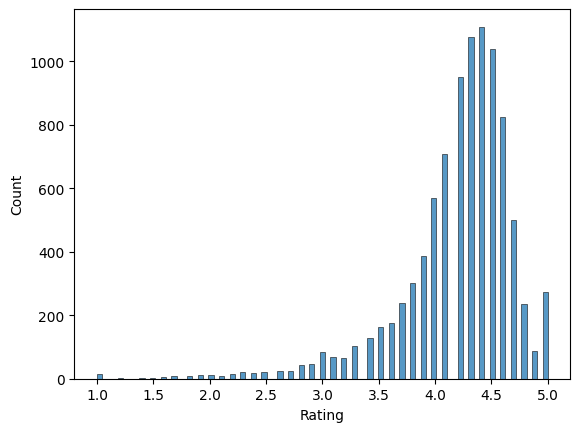

In [122]:
# Handling missing values in Ratings


sns.histplot(df['Rating'])

In [123]:
# Imputing with bfill

df['Rating'].fillna(df['Rating'].bfill(),inplace=True)

print(f'Number of Null Values in Rating: {df.Rating.isnull().sum()}')

Number of Null Values in Rating: 0


<Axes: xlabel='Rating', ylabel='Count'>

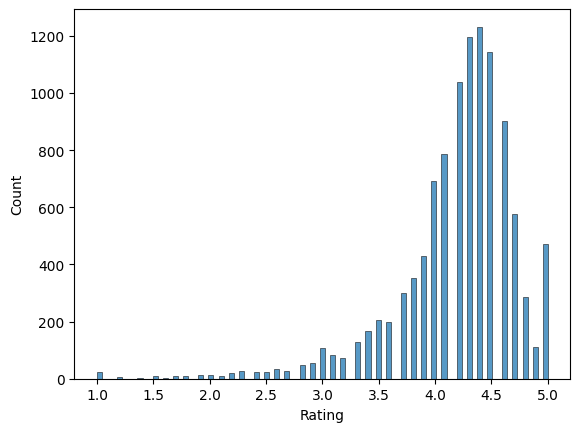

In [124]:
sns.histplot(df['Rating'])

#### 2) Reviews

Review must be in int but in object

In [125]:
df['Reviews'] = df['Reviews'].astype("int")

In [126]:
df['Reviews'].dtype

dtype('int32')

#### 3) Size

In [127]:
df["Size"].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [128]:
df[df['Size'] == "Varies with device"].shape

(1695, 13)

We will replace this value with 'nan' and also replace 'M' (Mega) with 'e+6' and 'k' (kilo) with 'e+3'. After that, we will convert the column to 'float64' data type. Then we will convert nan with mean values.

In [129]:
df['Size'] = df['Size'].replace('Varies with device' , np.nan)
df['Size'] = df['Size'].str.replace('M' , 'e+6')
df['Size'] = df['Size'].str.replace('k' , 'e+3')
df['Size'] = df['Size'].apply(lambda x: float(x)/1000)

df['Size'].dtype

df['Size'].fillna(df['Size'].mean(),inplace = True)

print(f'Number of Null Size: {df.Size.isnull().sum()}')

Number of Null Size: 0


#### 4) Installs

In [132]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [152]:
df["Installs"] = df["Installs"].str.replace("+","")
df["Installs"] = df["Installs"].str.replace(",","")

In [158]:
df['Installs'] = df['Installs'].astype("int")
df['Installs'].dtype

dtype('int32')

#### 5) Price

Price column must be float but it is object

In [163]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [168]:
df['Price'] = df['Price'].str.replace("$","")

df['Price'] = df['Price'].astype("float")
df['Price'].dtype

dtype('float64')

#### 6) Last Update

Convert this variable to datetime because use day, month and year separately

In [175]:
df["Last Updated"] = pd.to_datetime(df["Last Updated"])
df['Last Updated'].dtypeConvert this variable to datetime because use day, month and year separately

dtype('<M8[ns]')

In [177]:
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9659, dtype: int64

#### 7) Duplicate Rows

In [186]:
duplicates = df.duplicated(['App','Category','Type'],keep = "first")
df[duplicates].sort_values(by="App")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3800.000000,500000,Free,0.00,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26000.000000,1000000,Free,0.00,Everyone,Medical,2018-07-27,7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3800.000000,1000,Paid,16.99,Everyone,Medical,2017-01-27,1.0.5,4.0.3 and up
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.4,11506,15000.000000,100000,Free,0.00,Everyone,Health & Fitness,2018-08-02,3.0.0,4.1 and up
5415,365Scores - Live Scores,SPORTS,4.6,666246,25000.000000,10000000,Free,0.00,Everyone,Sports,2018-07-29,5.5.9,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34000.000000,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3014,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133825,34000.000000,10000000,Free,0.00,Everyone 10+,Sports,2018-07-25,6.17.2,4.4 and up
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,21516.529524,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,21516.529524,50000000,Free,0.00,Everyone,Travel & Local,2018-08-02,Varies with device,Varies with device


In [187]:
print(f'df before dropping duplicates: {df.shape}\n')

df.drop_duplicates(subset=['App', 'Category', 'Type'] , keep='first' , inplace=True)

print(f'df after dropping duplicates: {df.shape}\n')

df before dropping duplicates: (10840, 13)

df after dropping duplicates: (9745, 13)



In [188]:
df.to_excel("Google_paly_store_cleaned_data.xlsx")

In [191]:
df['Installs'].sum()

79938738527